# Dataset Browsing and Serving
in this notebook we will get to know the custome Datalopo Troch and Keras data generator

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dtlpy as dl
from dtlpy.ml.ml_dataset import get_torch_dataset

# Upload or Choose a Dataset
Start by uploading one of out example datasets or choose a dataset to serve
If you already have your dataloop env set - skip the following cell

In [14]:
# create and upload dataset
project = dl.projects.create('Data Generator Project')
dataset = project.datasets.create('FruitImage')
dataset.items.upload(local_path='datasets/FruitImage/items/*',
                    local_annotations_path='datasets/FruitImage/json')
# add labels
dataset.ontologies.list()[0].add_labels(['apple', 'orange', 'banana'])

0it [00:00, ?it/s]2021-08-31 13:46:46.370 [ERROR]-[items.upload]-[v1.35.3]dtlpy.repositories.uploader: Error uploading annotations to item id: 612e08952585c2185113f838
Traceback (most recent call last):
  File "e:\shabtay\fonda\venv\lib\site-packages\dtlpy\repositories\uploader.py", line 478, in __upload_single_item_wrapper
    item=item)
  File "e:\shabtay\fonda\venv\lib\site-packages\dtlpy\repositories\uploader.py", line 502, in __async_upload_annotations
    with open(annotations_filepath, 'r', encoding="utf8") as f:
FileNotFoundError: [Errno 2] No such file or directory: 'datasets/FruitImage/json\\test\\mixed_22.json'
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:09<00:00, 30.02it/s]


Get the Dataset we're going to work with

In [2]:
project = dl.projects.get('Data Generator Project')
dataset = project.datasets.get('FruitImage')

# Create a Vanilla Torch Dataset Object
This will download the datasetlocally and will create a torchvision.Dataset object that you can iterate over your data

In [3]:
torch_dataset = get_torch_dataset()(dataset_entity=dataset,
                                    annotation_type=dl.AnnotationType.BOX)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 1265.82it/s]


For example, we can get the image and box in index 10

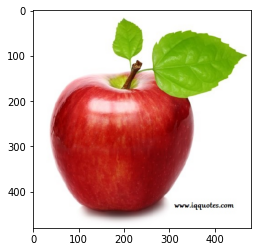

In [4]:
image, bb = torch_dataset[10]
plt.imshow(image)

Get or change the lable mapping

In [5]:
torch_dataset.label_to_id_map

{'apple': 0, 'banana': 1, 'orange': 2}


  0%|                                                                                                                                                                                                             | 0/100 [00:05<?, ?it/s]

Visualize random (or at index) data with annotations

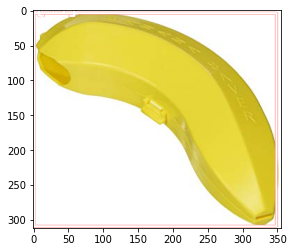

In [6]:
torch_dataset.visualize()

# Add Augmentations
We can add a torch Compose and add augmentation

We recommend using imgaug:

In [7]:
from imgaug import augmenters as iaa
from torchvision import transforms
augmentation = iaa.Sequential([
        iaa.Resize({"height": 256, "width": 256}),
        iaa.Superpixels(p_replace=(0, 0.5), n_segments=(10, 50)),
        iaa.flip.Fliplr(p=0.5),
        iaa.flip.Flipud(p=0.5),
        iaa.GaussianBlur(sigma=(0.0, 0.8)),
    ])
tfs = transforms.Compose([
    augmentation,
    np.copy,
#     transforms.ToTensor()
])
aug_dataset = get_torch_dataset()(dataset_entity=dataset,
                                  annotation_type=dl.AnnotationType.BOX,
                                  transforms=tfs)


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 198/300 [00:00<00:00, 1979.95it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 1880.69it/s]


e:\shabtay\fonda\venv\lib\site-packages\imgaug\augmenters\segmentation.py:191: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(image, n_segments=n_segments_samples[i], compactness=10)


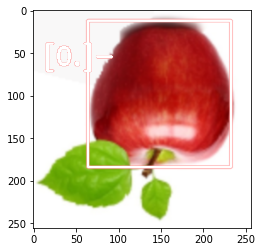


  0%|                                                                                                                                                                                                             | 0/100 [00:15<?, ?it/s]

In [8]:
aug_dataset.visualize(10)

Use "with_orig" flag to get both the transform and the original

In [9]:
aug_dataset.with_orig = True
image, bb, orig_image, orig_bb = aug_dataset[11]



  0%|                                                                                                                                                                                                             | 0/100 [00:05<?, ?it/s]

Showing the augmented vs. original

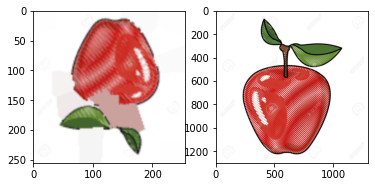


  0%|                                                                                                                                                                                                             | 0/100 [00:20<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [00:25<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [00:30<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [00:36<?, ?it/s]

  0%|                                                  

  0%|                                                                                                                                                                                                             | 0/100 [01:47<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [01:52<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [01:57<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [02:02<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [03:15<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [03:21<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [03:09<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [03:28<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [04:48<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [04:53<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [04:58<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [05:03<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [06:17<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [06:22<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [06:27<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [06:32<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [07:44<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [07:50<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [07:55<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [08:00<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [09:11<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [09:16<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [09:26<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [09:31<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [10:40<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [10:46<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [10:51<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [10:56<?, ?it/s]

  0%|                                                   

  0%|                                                                                                                                                                                                             | 0/100 [12:12<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [12:17<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [12:22<?, ?it/s]

  0%|                                                                                                                                                                                                             | 0/100 [12:27<?, ?it/s]

  0%|                                                   

In [10]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image);
ax[1].imshow(orig_image)

# Example: Very Complex Augmentation Pipeline
Example is taken from the imgaug documentation


In [7]:
import imgaug as ia
import imgaug.augmenters as iaa

# random example images
images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)

# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image
# All augmenters with per_channel=0.5 will sample one value _per image_
# in 50% of all cases. In all other cases they will sample new values
# _per channel_.

seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        sometimes(iaa.CropAndPad(
            percent=(-0.05, 0.1),
            pad_mode=ia.ALL,
            pad_cval=(0, 255)
        )),
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                ]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                iaa.SimplexNoiseAlpha(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                ])),
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                ]),
                iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    iaa.FrequencyNoiseAlpha(
                        exponent=(-4, 0),
                        first=iaa.Multiply((0.5, 1.5), per_channel=True),
                        second=iaa.LinearContrast((0.5, 2.0))
                    )
                ]),
                iaa.LinearContrast((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                iaa.Grayscale(alpha=(0.0, 1.0)),
                sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)


In [10]:
tfs = transforms.Compose([
    seq,
    np.copy,
#     transforms.ToTensor()
])
aug_dataset = DatasetCls(dataset_entity=dataset,
                        annotation_type=dl.AnnotationType.BOX,
                        transforms=tfs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.34it/s]
Exception in thread Thread-13:
Traceback (most recent call last):
  File "E:\Shabtay\dtlpy\dtlpy\repositories\downloader.py", line 390, in download_annotations
    annotation_zip_item.id))
  File "E:\Shabtay\dtlpy\dtlpy\exceptions.py", line 49, in __init__
    raise exceptions[self.status_code](status_code=self.status_code, message=self.message)
dtlpy.exceptions.NotFound: ('404', "error downloading annotation zip file. see above for more information. item id: '611d018caedd3bfef4ed5b29'")

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Shabtay\AppData\Local\Programs\Python\Python37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Shabtay\AppData\Loca

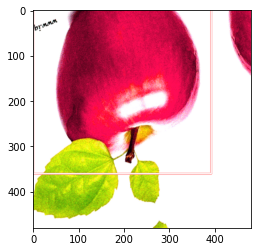

In [15]:
aug_dataset.visualize(10)

In [3]:

def pre(image):
    return image/255


tfs = [
    pre
]

aug_dataset = DatasetCls(dataset_entity=dataset,
                        annotation_type=dl.AnnotationType.BOX,
                        transforms=tfs)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.55it/s]
Exception in thread Thread-10:
Traceback (most recent call last):
  File "E:\Shabtay\dtlpy\dtlpy\repositories\downloader.py", line 390, in download_annotations
    annotation_zip_item.id))
  File "E:\Shabtay\dtlpy\dtlpy\exceptions.py", line 49, in __init__
    raise exceptions[self.status_code](status_code=self.status_code, message=self.message)
dtlpy.exceptions.NotFound: ('404', "error downloading annotation zip file. see above for more information. item id: '611d25abb1a7de454dfd2936'")

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Shabtay\AppData\Local\Programs\Python\Python37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Shabtay\AppData\Local\

In [4]:
aug_dataset.with_orig = True
aug_dataset.separate_labels = False
image, bb, orig_image, orig_bb = aug_dataset[11]


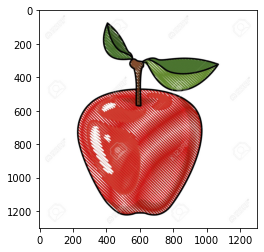

In [12]:
plt.imshow(image)


# Keras Data Generator